# HR ATTRIBUTION

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [2]:
df = pd.read_csv("HR_Analytics.csv")
df.head()
## how to convert the data into numeric data - age, NA, error-data
## Attrition: YES - employee left company and suddenly had job posted in linkedin
## Education level, Major

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [4]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]
## numeric

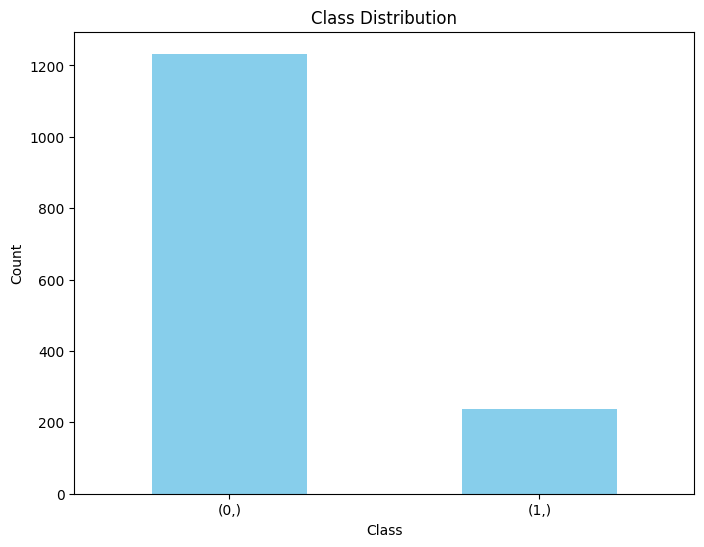

In [5]:
class_counts = y.value_counts()
# class_counts is a function that can count each value in a column, return an outcome kinda like the dictionary

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()

### How to turn string variable into categorical variable and turn them into dummy variable

In [6]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)

X.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=42)
# sklearn's function to split the dataframe into training and testing data set randomly, test_size shows the 
# proportion of test data size and random_state is a random seed.

# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [29]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)

acc=accuracy_score(y_test,y_pred)

print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

### Is there anything in this part has randomness? 


IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.79


We are a lil over-fitting cuz we in sample accuracy is prefectly 100%, we should reduce the model complexity 
we can do the cross-validation to reduce the complexity

# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [30]:

# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)
# cross-validation, we gonna check to find the best max_depth and gini value


grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
## we can refer to this dictionary that (below)

print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [31]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

## Out of sample increases and in sample drops 

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

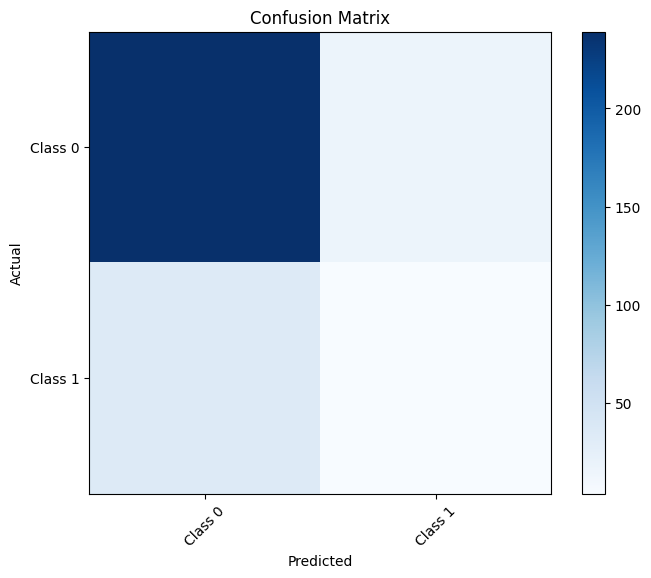

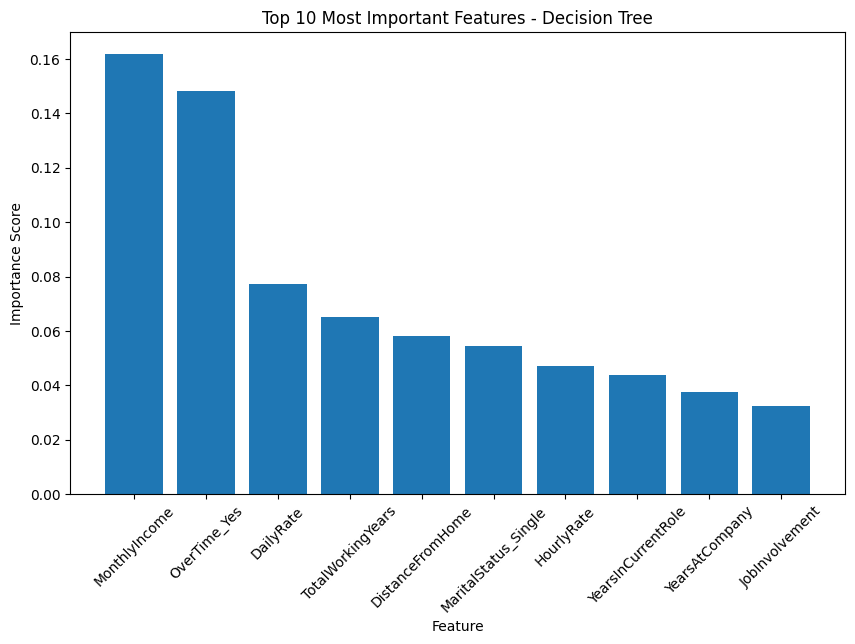

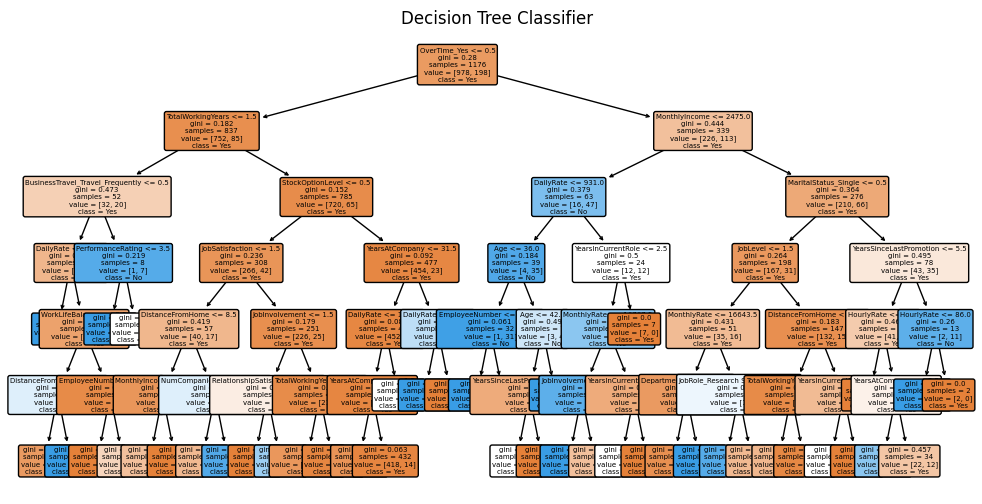

In [11]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"], rounded=True, fontsize=5)
plt.title('Decision Tree Classifier')
plt.show()


# 5.) Looking at the graphs. what would be your suggestions to try to improve customer retention? What additional information would you need for a better plan. Calculate anything you think would assist in your assessment.

## ANSWER :

In [37]:
## pay more 
## increase the OT - pay double at  OT 
## We don't know the direcation to improve each feature

In [38]:
np.corrcoef(np.array(X["OverTime_Yes"]), np.array(y["Attrition"]))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

In [39]:
np.corrcoef(np.array(X["MonthlyIncome"]), np.array(y["Attrition"]))

array([[ 1.        , -0.15983958],
       [-0.15983958,  1.        ]])

#### we need the correlation to know the effect direction of feature on Attrition. Based on the analysis before, we can tell that more OT, the less employee retention; More monthlyIncome, more employee retention.

# 6.) Using the Training Data, if they made everyone work overtime. What would have been the expected difference in client retention?

In [66]:
x_train_experiment = x_train.copy()

In [73]:
## if made everyone works overtime
x_train_experiment["OverTime_Yes"] = 1.0
y_pred_experiment = clf.predict(x_train_experiment)
y_pred = clf.predict(x_train)

In [74]:
print("Getting everyone working overtime work would have prevented ppl from leaving : ",sum(y_pred - y_pred_experiment) )

Getting everyone working overtime work would have prevented ppl from leaving :  -141


In [75]:
## if use 
x_train_experiment["OverTime_Yes"] = 0. ## let see what will happen if we change this data to do the experiment

In [76]:
y_pred_exeriment = clf.predict(x_train_experiment)
y_pred = clf.predict(x_train)

In [77]:
print("Stopping overtime work would have prevented ppl from leaving : ",sum(y_pred - y_pred_exeriment) )

## This could show us how many ppl we would save from leaving

Stopping overtime work would have prevented ppl from leaving :  59


# 7.) If the company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [44]:
x_train_experiment["Y"] = y_pred
x_train_experiment["Y_exp"] = y_pred_exeriment
x_train_experiment["Ret_Change"] = x_train_experiment["Y"] - x_train_experiment["Y_exp"]

In [45]:
# Saving : Change in Training cost 
sav = sum(x_train_experiment["Ret_Change"] * 2.8 * x_train_experiment["MonthlyIncome"])

In [46]:
# Cost of lost Overtime
cost = 2000 * len(x_train[x_train["OverTime_Yes"] == 1.])

In [47]:
x_train_experiment["Ret_Change"]
## if = -1, this employee would leave the company

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860    -1
1459    0
1126    0
Name: Ret_Change, Length: 1176, dtype: int64

In [49]:
print("THE PROFIT WE CALCULATE FROM THE EXPERIMENT : ",sav - cost)

THE PROFIT WE CALCULATE FROM THE EXPERIMENT :  -117593.99999999977


## ANSWER : 

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [50]:
raise_amout =  500

In [58]:
profits = []
for raise_amount in range(-1000,1000,100):
    x_train_experiment = x_train.copy()
    x_train_experiment["MonthlyIncome"] = x_train_experiment["MonthlyIncome"] + raise_amount
    
    y_pred_experiment = clf.predict(x_train_experiment)
    y_pred = clf.predict(x_train)
    
    x_train_experiment["Y"] = y_pred
    x_train_experiment["Y_exp"] = y_pred_experiment
    x_train_experiment["Ret_Change"] =x_train_experiment["Y"] - x_train_experiment["Y_exp"]
    
    ## Save
    sav = sum(x_train_experiment["Ret_Change"] * 2.8 * x_train_experiment["MonthlyIncome"])
    ## Cost 
    cost = raise_amount * len(x_train)
    ## Pro
    pro = sav - cost
    profits.append(pro)

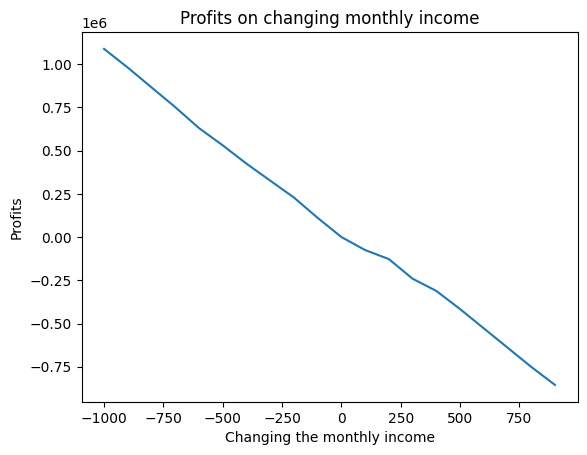

In [59]:
plt.plot(range(-1000,1000,100), profits)
plt.xlabel('Changing the monthly income')
plt.ylabel('Profits')
plt.title('Profits on changing monthly income')
plt.show()

According to the plot shown above, we can tell that with increase the monthly income, the company's profits will decrease continusely; with decrease the monthly income, the company's profits will increase continuesly. So the company should pay the employee less in a appropriate way to get profits as maximized as possible.